In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1
**Steps Followed**
1. First we have taken the input of the range of our Random Variables (X,Y)
2. Then, we have taken row wise input, of our tabular joint pmf.
3. First we have run the marginality check row wise and column wise.
4. Then we have run the independence check.

In [ ]:
x_range = [int(i) for i in input("Enter space separated range (start and stop) of X: ").split(" ")]
y_range = [int(i) for i in input("Enter space separated range (start and stop) of Y: ").split(" ")]
#this is the range random variables, start and stop are both inclusive

x_values = np.arange(x_range[0], x_range[1] + 1, 1)
y_values = np.arange(y_range[0], y_range[1] + 1, 1)

print("X values:", x_values)
print("Y values:", y_values)

joint_pmf_values = np.zeros((len(y_values), len(x_values)))

for i in range(len(y_values)):
    print(f"Enter {i+1} row space separated:")
    s = [float(i) for i in input().split(" ")]
    for j in range(len(x_values)):
        joint_pmf_values[i, j] = s[j]
#here we took the input of our joint PMF based on the range of RVs defined above
#Y random variable corresponds to column and X to rows

df = pd.DataFrame(joint_pmf_values, index=y_values, columns=x_values)

print("\n Joint PMF Table:")
print(df)
#we used dataframe from pandas to display better

condition1 = False #marginal check
condition2 = True #independence check

#marginal check
marginal_x = np.sum(joint_pmf_values, axis=0)
marginal_y = np.sum(joint_pmf_values, axis=1)

sum_x = np.sum(marginal_x)
sum_y = np.sum(marginal_y)

if sum_x==1 and sum_y==1:
  condition1=True

for i in range(len(y_values)):
    for j in range(len(x_values)):
        if joint_pmf_values[i, j] != marginal_x[j] * marginal_y[i]:
            condition2 = False
            break

if condition1 is True and condition2 is True:
  print("the given joint pmf corresponds to Independent Random Variables (X,Y)")
else:
  print("the given joint pmf does not correspond to Independent Random Variables (X,Y)")

Enter space separated range (start and stop) of X: 0 2
Enter space separated range (start and stop) of Y: 2 4
X values: [0 1 2]
Y values: [2 3 4]
Enter 1 row space separated:
.1 .1 0
Enter 2 row space separated:
.2 .1 .1
Enter 3 row space separated:
0 .2 .2

 Joint PMF Table:
     0    1    2
2  0.1  0.1  0.0
3  0.2  0.1  0.1
4  0.0  0.2  0.2
the given joint pmf does not correspond to Independent Random Variables (X,Y)


# Question 2
**Steps Followed**
1. We will use the same Joint PMF as entered in Question 1, to solve this consequent question.
2. Then we defined calculate_cdf function.
3. Then we calculated CDFs
4. then we plotted graphs (visualizations): Joint PMF and CDF, Marginal PMFs and then CDFs.




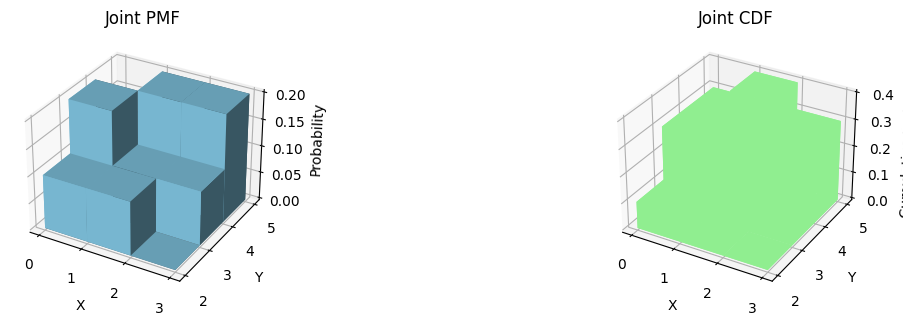

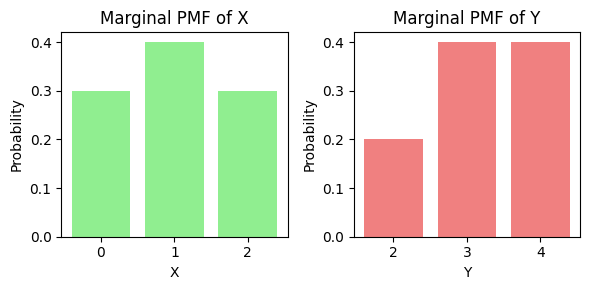

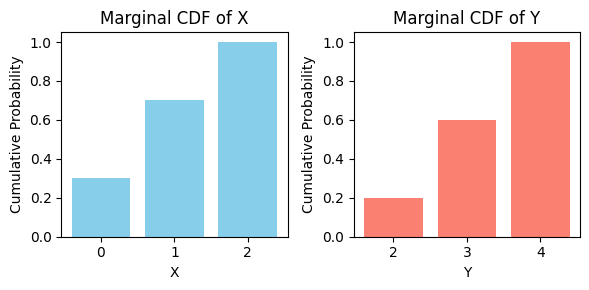

In [ ]:
def calculate_cdf(pmf):
#using this to calculate cdf
    cdf = pmf.copy()
    for i in range(1, pmf.shape[0]):
        cdf.iloc[i] = cdf.iloc[i] + cdf.iloc[i - 1]
    return cdf

#calculates joint and marginal CDFs
joint_cdf = calculate_cdf(df)
marginal_x_pmf = df.sum(axis=0)
marginal_y_pmf = df.sum(axis=1)
marginal_x_cdf = calculate_cdf(marginal_x_pmf)
marginal_y_cdf = calculate_cdf(marginal_y_pmf)

#graph plotting

#Joint PMF and CDF -> 3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')

_x = x_values
_y = y_values
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = joint_pmf_values.ravel()
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='skyblue')
ax1.set_title('Joint PMF')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Probability')

ax2 = fig.add_subplot(2, 2, 2, projection='3d')

top = joint_cdf.values.ravel()

ax2.bar3d(x, y, bottom, width, depth, top, shade=False, color='lightgreen')
ax2.set_title('Joint CDF')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Cumulative Probability')

plt.tight_layout()
plt.show()

#marginal PMFs of x and y
fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(x_values, marginal_x_pmf, color='lightgreen')
ax1.set_title('Marginal PMF of X')
ax1.set_xlabel('X')
ax1.set_ylabel('Probability')

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(y_values, marginal_y_pmf, color='lightcoral')
ax2.set_title('Marginal PMF of Y')
ax2.set_xlabel('Y')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()

#marginal CDFs of x and y
fig = plt.figure(figsize=(6, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(x_values, marginal_x_cdf, color='skyblue')
ax1.set_title('Marginal CDF of X')
ax1.set_xlabel('X')
ax1.set_ylabel('Cumulative Probability')

ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(y_values, marginal_y_cdf, color='salmon')
ax2.set_title('Marginal CDF of Y')
ax2.set_xlabel('Y')
ax2.set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

# Question 3


In [ ]:
py = np.sum(joint_pmf_values, axis=0) #row wise addition array (y behaves as row)
px = np.sum(joint_pmf_values, axis=1) #column wise addition array (x behaves as column)

#Calculates expected values
ex = np.sum(x_values * px)
ey = np.sum(y_values * py)

#Calculates E[XY]
exy = np.sum(np.outer(y_values, x_values) * joint_pmf_values)

#Calculates E[X1Y1]
x1 = x_values - ex
y1 = y_values - ey
ex1y1 = np.sum(np.outer(y1, x1) * joint_pmf_values)

print("Expected Value of XY (E[XY]):", exy)
print("Expected Value of X1Y1 (E[X1Y1]):", ex1y1)

Expected Value of XY (E[XY]): 3.5
Expected Value of X1Y1 (E[X1Y1]): 0.26000000000000006
